<a href="https://colab.research.google.com/github/RobertENasc/projetos_data_science/blob/main/1_Analisando_os_Dados_do_Airbnb_Londres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Londres, Inglaterra*

O [Airbnb](https://www.airbnb.com.br/) nasceu em 2007, quando dois anfitriões receberam três hóspedes em sua casa em São Francisco.Contando (até junho de 2021)
 
com mais de 4 milhões de anfitriões, que já receberam mais de **1 bilhão** (até setembro de 2021) de hóspedes em quase todos os países.
Todos os dias, os anfitriões oferecem acomodações e experiências únicas, que possibilitam aos hóspedes uma conexão mais autêntica com as comunidade. 
fonte [Airbnb](https://news.airbnb.com/br/about-us/)

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Londres, e ver quais insights podem ser extraídos a partir de dados brutos.**

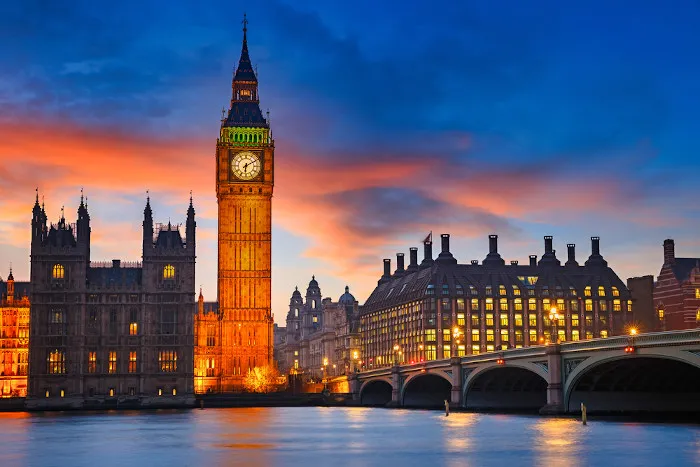

##Londres
Com uma População total de 8.982.000 habitantes (2019), a cidade de Londres localizada no sudeste da Inglaterra, é a capital do Reino Unido. O município é um dos principais centros econômicos e culturais de todo o planeta.Os londrinos desfrutam de uma elevada qualidade de vida e de moderna infraestrutura de transportes e comunicações. A geografia local é marcada pelo clima temperado, com seu tempo frio e chuvoso. A cidade de Londres tem uma cultura muito diversificada, com forte presença de imigrantes, que contribuíram para a formação identitária local. A capital britânica tem como curiosidade a forte presença de estrangeiros na sua população.
Além de locais famosos como o Big Ben, o Palácio de Buckingham e a London Eye,   Londres conta com inúmeras atrações musicais, peças de teatro, museus e shows. A cidade é um lugar perfeito para aprender o inglês.
Londres está entre as cidades mais caras da Europa e uma das mais visitadas do mundo. Diante disso, o Airbnb é uma ótima opção para encontrar hospedagem com um melhor custo x benefício.

O objetivo desse projeto,como foi citado anteriormente,é analisar os dados referente à cidade de Londres, e ver quais insights podemos obter através dos dados fornecidos.

## Obtenção dos Dados

Para esta análise exploratória inicial, será baixado apenas o arquivo csv:
* `listings.csv` - *Summary information and metrics for listings in London (good for visualisations).*.
Arquivo obtido a partir do site
[Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Vamos ao projeto.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/listings.csv")

## Análise dos Dados
Antes de iniciar qualquer análise, vamos verificar nosso dataset (conjunto de dados)visualizando as 5 primeiras entradas e assim ter um entendimento de como os dados estão estruturados.

In [3]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.568610,-0.112700,Private room,79,1,40,2022-10-30,0.27,2,361,18,NaN
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.487800,-0.168130,Entire home/apt,75,10,92,2022-10-24,0.58,1,29,3,NaN
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.521950,-0.140940,Entire home/apt,425,4,54,2022-11-19,0.38,7,241,11,NaN
3,172811,Nice double bedroom in NW London,806983,Elinor,NaN,Camden,51.547100,-0.179810,Entire home/apt,229,21,0,NaN,NaN,1,0,0,NaN
4,173082,The Residential Suite Above Gallery,813141,Ingrid,NaN,Hackney,51.538254,-0.044086,Entire home/apt,132,2,199,2022-11-30,1.44,2,111,3,NaN


**Dicionário das variáveis**
Descrição de cada coluna do nosso *dataset* (conjunto de dados).

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - nome do grupo no qual o bairro pertence
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - quantidade de avaliações nos últimos 12 meses 
* `license` - número de registro do imóvel

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna. Lembrando que este dataset (conjunto de dados) que baixamos é a versão "resumida" do Airbnb.

In [7]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

Entradas:	71938
Variáveis:	18



In [8]:
# verificar o tipo das variáveis
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**


In [9]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
round (df.isnull().sum() / df.shape[0]*100,1).sort_values(ascending=False)

license                           100.0
neighbourhood_group               100.0
reviews_per_month                  23.8
last_review                        23.8
minimum_nights                      0.0
number_of_reviews_ltm               0.0
availability_365                    0.0
calculated_host_listings_count      0.0
number_of_reviews                   0.0
id                                  0.0
name                                0.0
room_type                           0.0
longitude                           0.0
latitude                            0.0
neighbourhood                       0.0
host_name                           0.0
host_id                             0.0
price                               0.0
dtype: float64

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* As variáveis `license`e `neighbourhood_group `possui 100% dos seus valores ausentes. 
* As variáveis `reviews_per_month` e `last_review`têm menos de 25% dos valores ausentes.

Como não contém nenhuma informação, as variáveis com 100% dos seus valores ausentes serão excluídas.

In [10]:
# Criando um novo DataFrame
df_nv = df.copy()

# excluindo colunas com dados faltantes
df_nv.drop(columns=['license', 'neighbourhood_group'], inplace=True)


### **Q3. Há outliers presentes?**
Outliers são dados que se diferenciam drasticamente de todos os outros.Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.
Para tratar dos outliers do nosso dataset (conjunto de dados), iremos analisar:
* Distribuição estatística
* Plotar `boxplots` para a variável.
* Utilizar a Regra do IQR.

Lembrando que o IQR (a variação interquartil) pode ser usada para identificar matematicamente os outliers de um conjunto de dados.
 Sua Fórmula: **IQR = Q3 - Q1** (Terceiro Quartil 75% pelo Primeiro Quartil 25%).

Vamos dar uma olhada na distribuição dos dados e ver o que identificamos.

In [11]:
# verificando a distribuição estatística das variáveis numéricas
df_nv[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,71938.0,71938.0,71938.0,54815.0,71938.0,71938.0
mean,179.0,5.8,17.9,0.9,12.7,112.4
std,459.4,24.2,41.2,1.3,39.9,135.8
min,0.0,1.0,0.0,0.0,1.0,0.0
25%,59.0,1.0,1.0,0.1,1.0,0.0
50%,100.0,2.0,4.0,0.5,1.0,40.0
75%,180.0,4.0,16.0,1.2,4.0,232.0
max,53588.0,1125.0,1171.0,48.0,281.0,365.0


**informações estatísticas relevantes:**
*   count - quantidade de entradas válida
*   mean - média dos valores
*   std - desvio padrão
*   min - menor valor da coluna
*   25% - percentil 25
*   50% - percentil 50 (e mediana)
*   75% - percentil 75
*   max - maior valor da coluna

Na nossa Distribuição Estatística, alguns pontos chamam a nossa atenção, como por exemplo:

* A variável `price` tem o mim (mínimo) em 0. Sendo que o Q3 (75% - percentil 75)
 está em 180 libras , mas o máximo está em 53.588 mil libras. Existe outliers aqui.
* A variável `minimum_nights` tem como seu máximo o valor 1.125, sendo que o Q3  (75% - percentil 75) está em 4. Existe outliers também.
* Essas duas variáveis serão a base para nossa análise.

### **Q4. Qual o tipo de distribuição das variáveis?** 
Vamos usar um histograma, que é uma das principais ferramentas da estatística para extrair informações sobre frequência e distribuição dos dados.

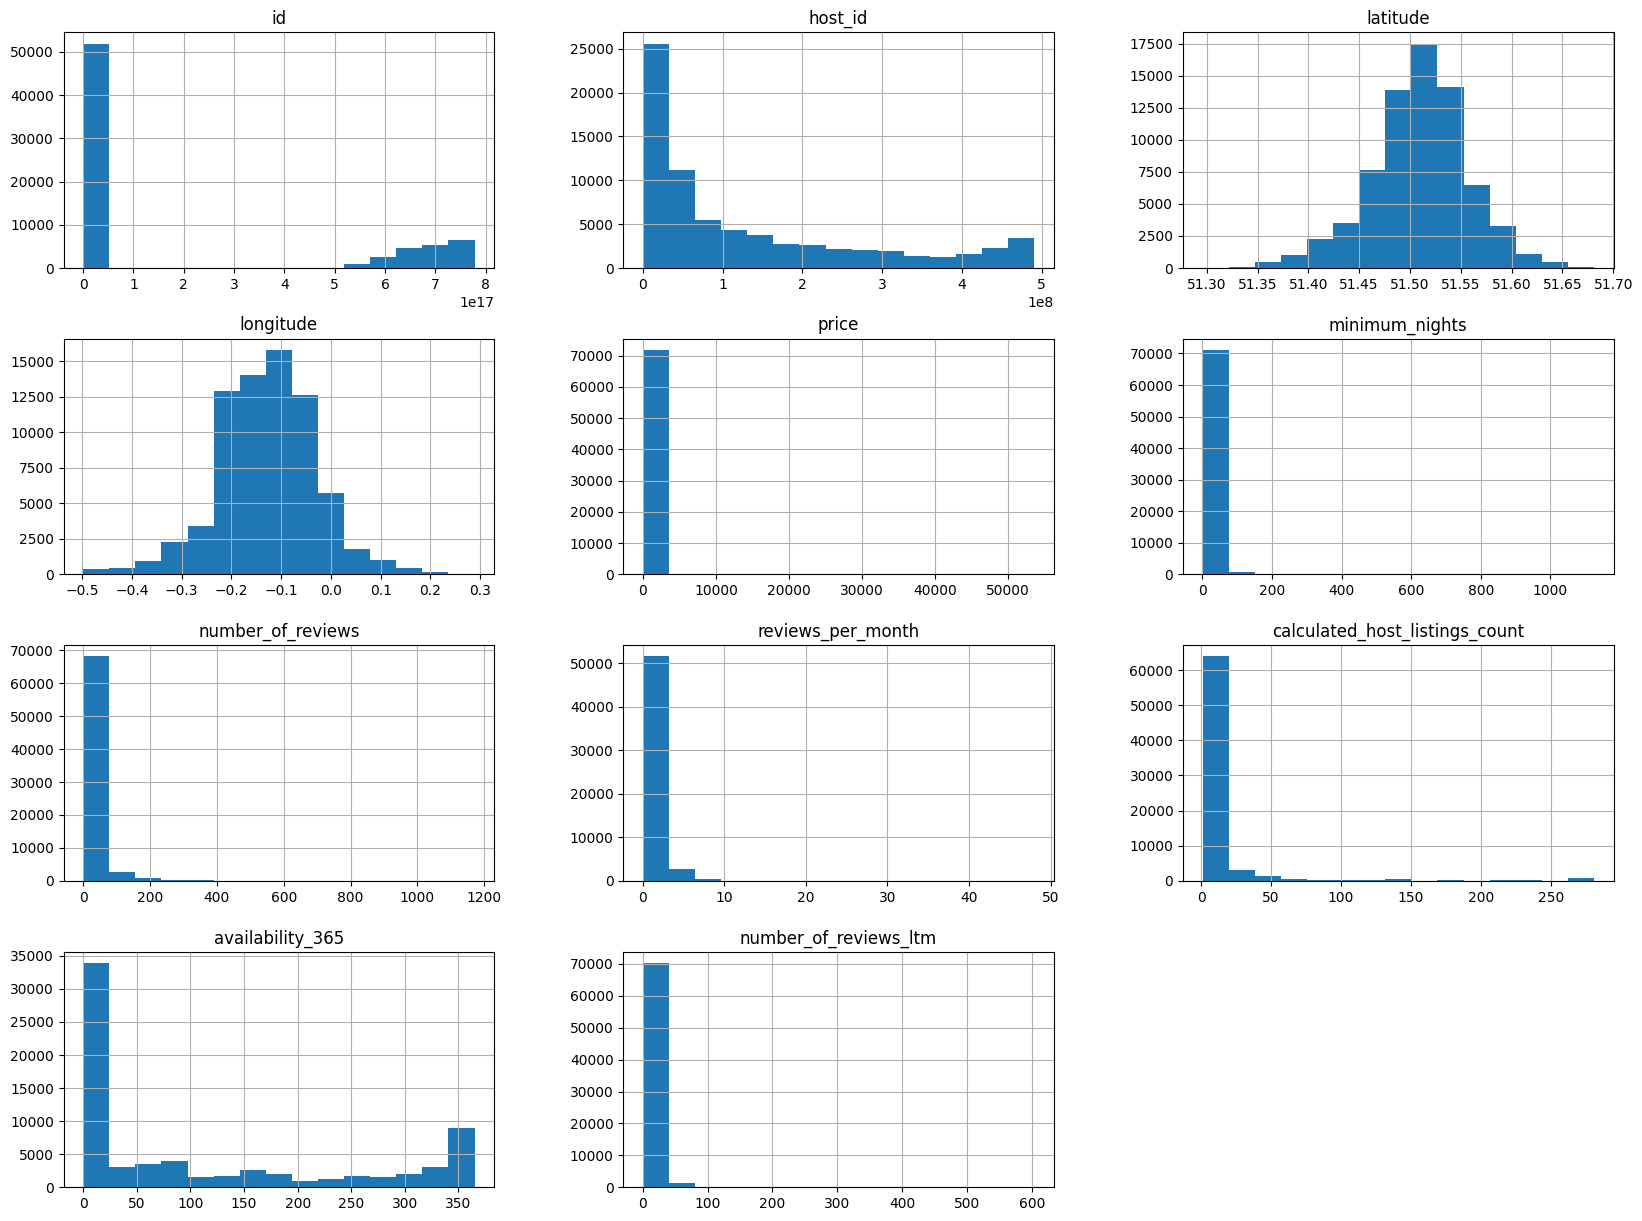

In [15]:
# plotar o histograma das variáveis numéricas
df_nv.hist(bins=15, figsize=(20,15));

No histograma, é possível ver nas variáveis `price` e  `minimum_nights`' a presença de outliers. Não que outras não tenham,mas apenas essa duas serão nossa base para análise. Vamos tratá-los seguindo os passos:

* Definição do Q1 e Q3 para as variáveis que serão tratadas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior.
* Remover os outliers.

In [18]:
# identificando os outliers para a variável price
q1_price = df_nv.price.quantile(.25)
q3_price = df_nv.price.quantile(.75)
iqr_price = q3_price - q1_price
print('iqr da variável price: ', iqr_price)

# definir os limites superiores e inferiores                                      
sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price

print('Limite superior de prince: ', sup_price)
print('Limite inferior de prince: ', inf_price)

iqr da variável price:  121.0
Limite superior de prince:  361.5
Limite inferior de prince:  -122.5


Plotando Bloxplot para variável `price`

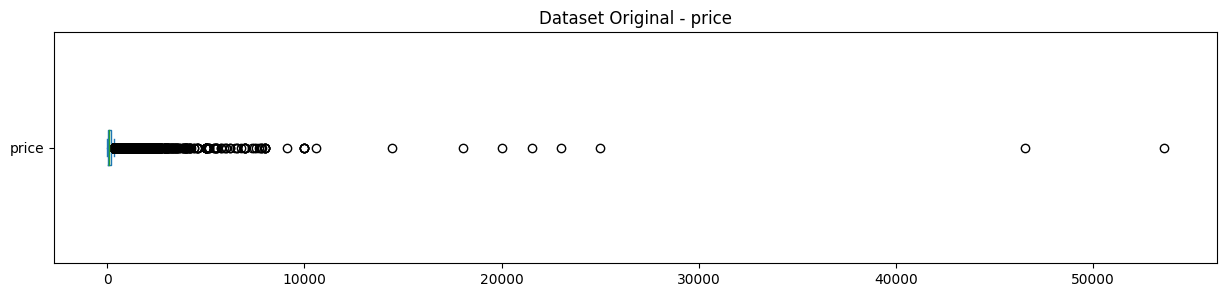

O dataset possui 71938 colunas
5692 Entradas acima de 361.5
Representam 7.91% do dataset


In [21]:
# Bloxplot para price
fig, ax = plt.subplots(figsize=(15,3))
df_nv.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df_nv.shape[0]))
print("{} Entradas acima de 361.5".format(len(df_nv[df_nv.price > 361.5])))
print("Representam {:.2f}% do dataset".format((len(df_nv[df_nv.price > 361.5]) / df_nv.shape[0])*100))

Plotando Bloxplot para variável `minimum_nights`

In [23]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_nv.minimum_nights.quantile(.25)
q3_minimum_nights = df_nv.minimum_nights.quantile(.75)
Irq_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('iqr da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

iqr da variável minimum_nights:  3.0
Limite superior de minimum_nights:  8.5
Limite inferior de minimum_nights:  -3.5


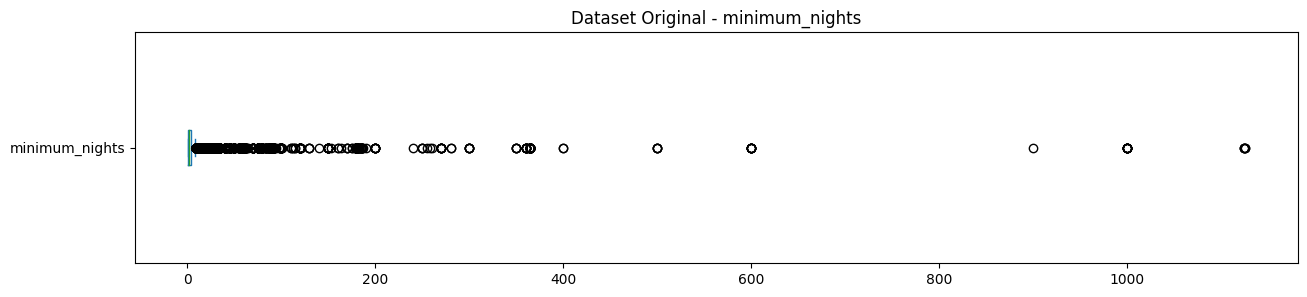

O dataset possui 71938 colunas
6212 Entradas acima de 8.5
Representam 8.64% do dataset


In [24]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_nv.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df_nv.shape[0]))
print("{} Entradas acima de 8.5".format(len(df_nv[df_nv.minimum_nights > 8.5])))
print("Representam {:.2f}% do dataset".format((len(df_nv[df_nv.minimum_nights > 8.5]) / df_nv.shape[0])*100))

In [32]:
# remover os *outliers* em um novo DataFrame
df_nv_clean = df_nv.copy()

df_nv_clean.drop(df_nv_clean[df_nv_clean.price > 361.5].index, axis=0, inplace=True)
df_nv_clean.drop(df_nv_clean[df_nv_clean.price == 0.0].index, axis=0, inplace=True)
df_nv_clean.drop(df_nv_clean[df_nv_clean.minimum_nights > 8.5].index, axis=0, inplace=True)

print('Entradas e Variáveis antes da limpeza: ', df.shape)
print('Entradas e Variáveis após a limpeza: ',df_nv_clean.shape)

Entradas e Variáveis antes da limpeza:  (71938, 18)
Entradas e Variáveis após a limpeza:  (60526, 16)


In [31]:
# verificando a distribuição estatística das variáveis numéricas após a limpeza
df_nv_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,60526.0,60526.0,60526.0,47657.0,60526.0,60526.0
mean,114.1,2.6,19.4,1.0,8.7,104.4
std,75.8,1.7,43.7,1.4,29.2,133.7
min,7.0,1.0,0.0,0.0,1.0,0.0
25%,55.0,1.0,1.0,0.1,1.0,0.0
50%,95.0,2.0,5.0,0.5,1.0,22.0
75%,151.0,3.0,18.0,1.2,3.0,196.0
max,361.0,8.0,1171.0,48.0,281.0,365.0


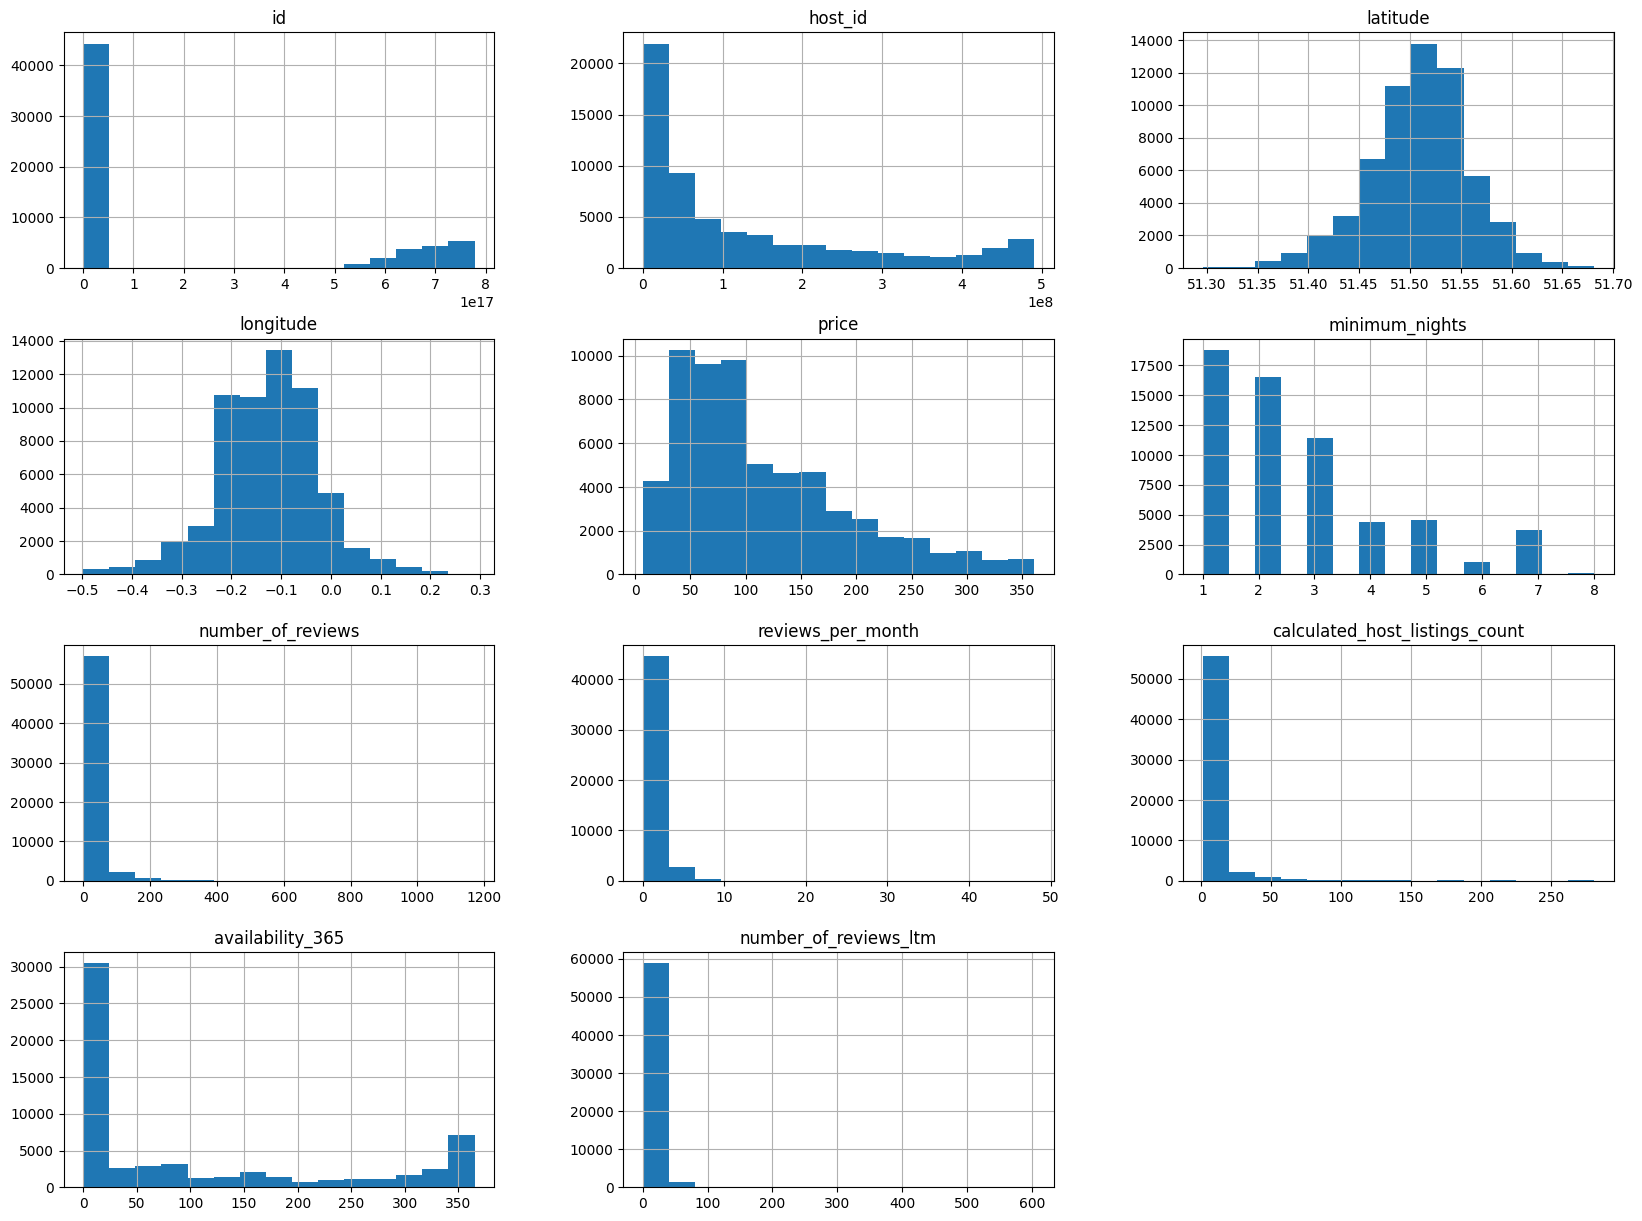

In [34]:
# plotar o histograma das variáveis numéricas após a limpeza
df_nv_clean.hist(bins=15, figsize=(20,15));

Agora é possível visualizar uma melhor distribuição dos nossos dados.

### **Q5. Qual a média dos preços de aluguel?**

In [35]:
# ver a média da coluna `price``
mean_price = (f'{df_nv_clean.price.mean():.2f}')
print(f'O valor médio do aluguel é de {mean_price} Libras')

O valor médio do aluguel é de 114.11 Libras


equivante a 721,23 reais

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vamos:

* Criar uma matriz de correlação
* Gerar um *heatmap* (mapa de calor) a partir dessa matriz, usando a biblioteca `seaborn`

In [37]:
# criar uma matriz de correlação
corr = df_nv_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(corr)
# mostrar a matriz de correlação

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.165598,-0.052609,0.064770,0.136957,0.234221
minimum_nights,0.165598,1.000000,-0.097313,-0.196320,0.045309,-0.054564
number_of_reviews,-0.052609,-0.097313,1.000000,0.448947,-0.024059,0.073893
reviews_per_month,0.064770,-0.196320,0.448947,1.000000,-0.005238,0.274354
calculated_host_listings_count,0.136957,0.045309,-0.024059,-0.005238,1.000000,0.080411
availability_365,0.234221,-0.054564,0.073893,0.274354,0.080411,1.000000


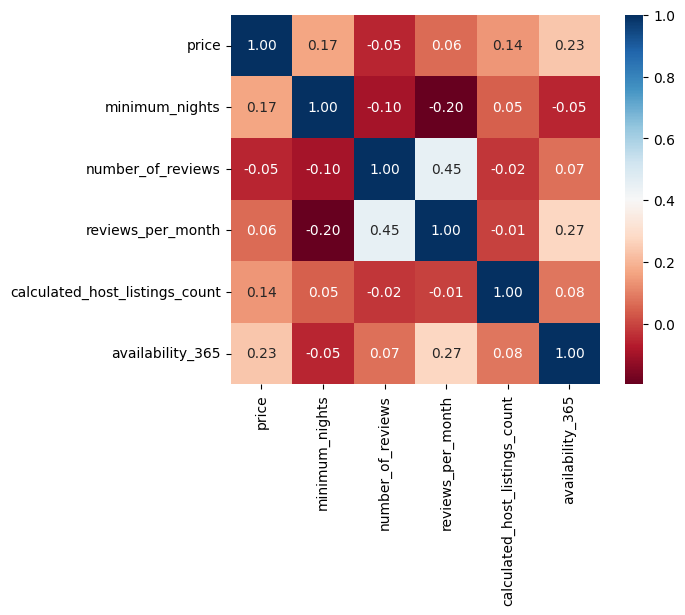

In [38]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [39]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_nv_clean.room_type.value_counts()

Entire home/apt    34365
Private room       25624
Shared room          358
Hotel room           179
Name: room_type, dtype: int64

In [40]:
# mostrar a porcentagem de cada tipo de imóvel disponível
round (df_nv_clean.room_type.value_counts() / df_nv.shape[0]*100,2)

Entire home/apt    47.77
Private room       35.62
Shared room         0.50
Hotel room          0.25
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**



In [41]:
# ver preços por bairros, na média
round (df_nv_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])

neighbourhood
City of London            174.0
Kensington and Chelsea    166.0
Westminster               156.0
Camden                    131.0
Hammersmith and Fulham    126.0
Richmond upon Thames      123.0
Wandsworth                115.0
Islington                 112.0
Southwark                 110.0
Merton                    108.0
Name: price, dtype: float64

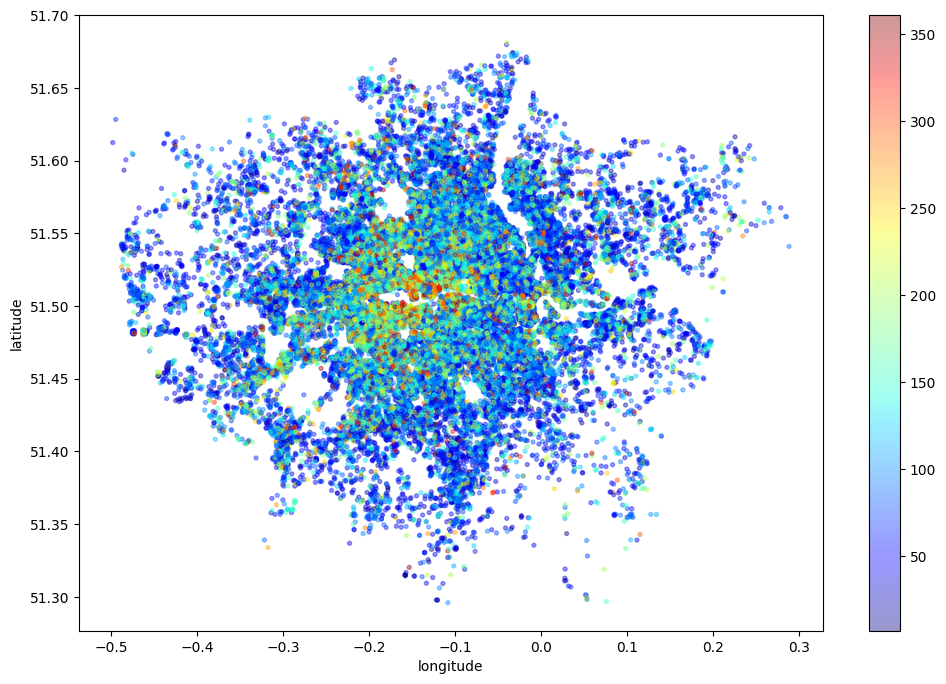

In [43]:
# plotar os imóveis pela latitude-longitude
df_nv_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_nv_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [44]:
# ver a média da coluna `minimum_nights``
mean_minimum_nights = (f'{df_nv_clean.minimum_nights.mean():.2f}')
print(f'A média é de {mean_minimum_nights} noites')

A média é de 2.64 noites


## Conclusões


A análise de dados foi realizada com os dados do Airbnb da cidade de Londres. Foi necessário excluir dados ausentes e fazer a limpeza dos outliers nas variáveis price e minimum_nights para obter um dataset mais próximo a realidade. Essa análise foi feita com uma base de dados resumida, acredito que atendeu o que foi proposto nesse projeto.